In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import smooth_signal
from utils import Scale

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 10
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

12960


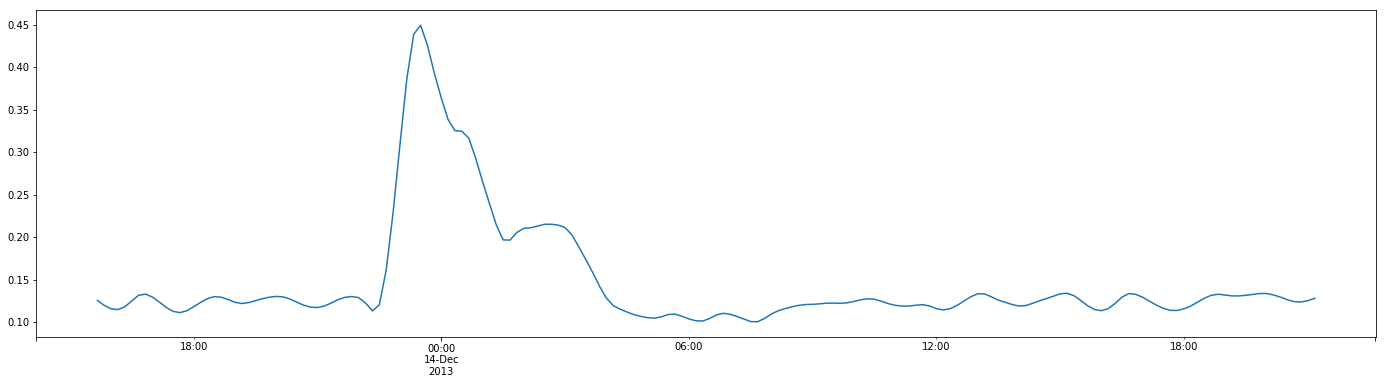

In [2]:
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
s4 = df_series_s4['sj2']
print(len(s4))
s4[1822:2000].plot(figsize=(24,6))

In [3]:
s4['2013/12/14 00:00:00']

0.363776152454758

In [4]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
vtec = df_series_vtec['sj2']
vtec_pi = df_series_vtec['25']
vtec_bsa = df_series_vtec['bsa']

gvtec_pi = vtec - vtec_pi
gvtec_bsa = vtec - vtec_bsa

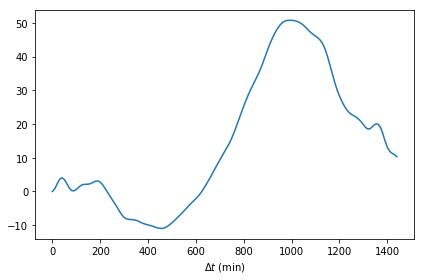

In [5]:
df = pd.DataFrame(index=vtec.index.values)
list_df = []

for i in range(0, 145):
    vtec_lag = vtec.shift(i)
    vtec_dt = vtec - vtec_lag
    df['vtec_' + str(i)] = vtec_dt.values
    list_df.append(10*i)
    
array_df = np.array(list_df)
df = df.dropna()

df.head()

array_y = df.loc['2013/12/14 00:00:00'].values
#fig = plt.figure(figsize=(18, 8));
#ax = fig.add_axes([0., 0., 1., 1.])
plt.xlabel(r'$\Delta{t}$ (min)')
plt.plot(array_df, array_y)
plt.tight_layout()
plt.savefig('./images/fin_dif_vtec.eps', format='eps', dpi=1000)

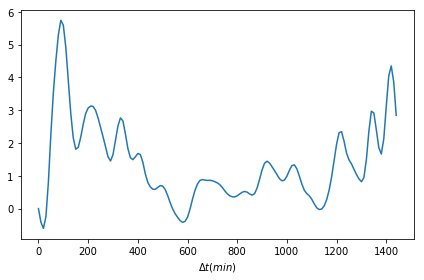

In [6]:
df_gvtec_pi = pd.DataFrame(index=gvtec_pi.index.values)
list_df = []

for i in range(0, 145):
    gvtec_pi_lag = gvtec_pi.shift(i)
    gvtec_pi_dt = gvtec_pi - gvtec_pi_lag
    df_gvtec_pi['gvtec_pi_' + str(i)] = gvtec_pi_dt.values
    list_df.append(10*i)
    
array_df = np.array(list_df)
df_gvtec_pi = df_gvtec_pi.dropna()

df_gvtec_pi.head()

array_y = df_gvtec_pi.loc['2013/12/14 00:00:00'].values
#fig = plt.figure(figsize=(18, 8));
#ax = fig.add_axes([0., 0., 1., 1.])
plt.xlabel(r'$\Delta{t} (min)$')
plt.plot(array_df, array_y)
plt.tight_layout()
plt.savefig('./images/fin_dif_gvtec1.eps', format='eps', dpi=1000)

In [7]:
best = 0
for i, value in enumerate(array_y[0:30]):
    if array_y[best] < value:
        best = i
        
print(best)
for i, value in enumerate(array_y[0:30]):
    print(i, ': ', value)

9
0 :  0.0
1 :  -0.417658959643326
2 :  -0.6044284166838878
3 :  -0.24954294590009596
4 :  0.8123396987511029
5 :  2.275952150027173
6 :  3.548877303373409
7 :  4.508693236050938
8 :  5.296644217419534
9 :  5.743492656618585
10 :  5.596216801535476
11 :  4.921132933409893
12 :  3.919821947565488
13 :  2.9065416777730277
14 :  2.1613036929736182
15 :  1.8115675424229778
16 :  1.8653958945890565
17 :  2.1747445575563518
18 :  2.5668068893554903
19 :  2.900152719253043
20 :  3.0682817834727416
21 :  3.126567400536665
22 :  3.11672280465946
23 :  2.9959268268563974
24 :  2.760840886961269
25 :  2.4766158157966274
26 :  2.190747032140706
27 :  1.887595281467533
28 :  1.5779327662721059
29 :  1.452399238272875


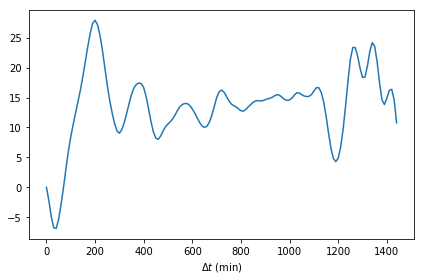

In [8]:
df_gvtec_bsa = pd.DataFrame(index=gvtec_pi.index.values)
list_df = []

for i in range(0, 145):
    gvtec_bsa_lag = gvtec_bsa.shift(i)
    gvtec_bsa_dt = gvtec_bsa - gvtec_bsa_lag
    df_gvtec_bsa['gvtec_bsa_' + str(i)] = gvtec_bsa_dt.values
    list_df.append(10*i)
    
array_df = np.array(list_df)
df_gvtec_bsa = df_gvtec_bsa.dropna()

df_gvtec_bsa.head()

array_y = df_gvtec_bsa.loc['2013/12/14 00:00:00'].values
#fig = plt.figure(figsize=(18, 8));
#ax = fig.add_axes([0., 0., 1., 1.])
plt.plot(array_df, array_y)
plt.xlabel(r'$\Delta{t}$ (min)')
plt.tight_layout()
plt.savefig('./images/fin_dif_gvtec2.eps', format='eps', dpi=1000)

In [9]:
best = 0
for i, value in enumerate(array_y[0:30]):
    if array_y[best] < value:
        best = i
        
print(best)
for i, value in enumerate(array_y[0:30]):
    print(i, ': ', value)

20
0 :  0.0
1 :  -2.2158325517255584
2 :  -4.927072788350465
3 :  -6.731851482305114
4 :  -6.842517586102915
5 :  -5.317104653316068
6 :  -2.878047227793001
7 :  -0.03997373214066613
8 :  3.057119366238254
9 :  5.987511840078028
10 :  8.433254522109458
11 :  10.528691833605045
12 :  12.479470128291126
13 :  14.35092672806789
14 :  16.33471618857194
15 :  18.600582839097875
16 :  21.06797568705607
17 :  23.494467698167938
18 :  25.726328471240038
19 :  27.36549296512863
20 :  27.887390511768366
21 :  27.147132646944442
22 :  25.40883532014768
23 :  22.94042447311756
24 :  20.020535786392955
25 :  17.08389852807042
26 :  14.556244132900027
27 :  12.460116287899986
28 :  10.67497231727657
29 :  9.412688042945732
